In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns

# EDA y NLP

- 02_user_review_NLP.parquet

In [2]:
# Direccion del archivo comprimido y reconvertido
user_reviews_content = '_data/02_user_reviews_NLP.parquet'

# Cargar directamente el archivo comprimido en un DataFrame
user_reviews_dataset = pd.read_parquet(user_reviews_content)

- 02_users_items_final.parquet

In [3]:
# Direccion del archivo comprimido y reconvertido
users_items_content = '_data/02_users_items_final.parquet'

# Cargar directamente el archivo comprimido en un DataFrame
users_items_dataset = pd.read_parquet(users_items_content)

- 02_steam_games_final.parquet

In [4]:
# Direccion del archivo comprimido y reconvertido
steam_games_content = '_data/02_steam_games_FastAPI.parquet'

# Cargar directamente el archivo comprimido en un DataFrame
steam_games_dataset = pd.read_parquet(steam_games_content)

---

# Análisis de lo obtenido en NLP

## Revision de 'recommend' vs. 'sentiment_analysis'

### Correspondencias entre la recomendación dada y algunos datos cuantitativos de dichas columnas.

Convertimos los valores de 'recommend' a valores booleanos por si acaso.

In [5]:
user_reviews_dataset['recommend'] = user_reviews_dataset['recommend'].astype(bool)

In [6]:
user_reviews_dataset = user_reviews_dataset.drop_duplicates()


In [7]:
user_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58431 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             58431 non-null  object
 1   item_id             58431 non-null  int64 
 2   posted              58431 non-null  object
 3   recommend           58431 non-null  bool  
 4   sentiment_analysis  58431 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 2.3+ MB


- Análisis Cuantitativo

In [8]:
# Calculo de la cantidad de valores True y False en la columna 'recommend'
total_count = len(user_reviews_dataset)
print("Cantidad total de Filas:", total_count)
celdas_vacias_por_columna = user_reviews_dataset['recommend'].isnull().sum()
print("\nCantidad celdas vacias en 'recommend':",celdas_vacias_por_columna)
celdas_nan_por_columna = user_reviews_dataset['recommend'].isna().sum()
print("Cantidad celdas NaN en 'recommend':",celdas_nan_por_columna)
true_count = (user_reviews_dataset['recommend'] == True).sum()
print("\nCantidad de valores 'True' en la columna 'recommend':", true_count)
false_count = (user_reviews_dataset['recommend'] == False).sum()
print("Cantidad de valores 'False' en la columna 'recommend':", false_count)
# Calculo de porcentajes
true_percentage = (true_count / total_count) * 100
false_percentage = (false_count / total_count) * 100
print(f"\nPorcentaje de True: {true_percentage:.2f}%")
print(f"Porcentaje de False: {false_percentage:.2f}%")

Cantidad total de Filas: 58431

Cantidad celdas vacias en 'recommend': 0
Cantidad celdas NaN en 'recommend': 0

Cantidad de valores 'True' en la columna 'recommend': 51692
Cantidad de valores 'False' en la columna 'recommend': 6739

Porcentaje de True: 88.47%
Porcentaje de False: 11.53%


- Análsis porcentual de las correspondencias entre 'sentiment_analysis' y 'recommend'

In [9]:
total_rows = len(user_reviews_dataset)

conditions = {
    'true_positive': sum(user_reviews_dataset['recommend'] & (user_reviews_dataset['sentiment_analysis'] == 2)),
    'true_negative': sum(user_reviews_dataset['recommend'] & (user_reviews_dataset['sentiment_analysis'] == 0)),
    'true_neutral': sum(user_reviews_dataset['recommend'] & (user_reviews_dataset['sentiment_analysis'] == 1)),
    'false_positive': sum(~user_reviews_dataset['recommend'] & (user_reviews_dataset['sentiment_analysis'] == 2)),
    'false_negative': sum(~user_reviews_dataset['recommend'] & (user_reviews_dataset['sentiment_analysis'] == 0)),
    'false_neutral': sum(~user_reviews_dataset['recommend'] & (user_reviews_dataset['sentiment_analysis'] == 1))
}

correspondence_percentage = {key: (value / total_rows) * 100 for key, value in conditions.items()}

for key, value in correspondence_percentage.items():
    print(f"El porcentaje de correspondencia {key.replace('_', '-')} es: {value:.2f}%")


El porcentaje de correspondencia true-positive es: 58.02%
El porcentaje de correspondencia true-negative es: 11.64%
El porcentaje de correspondencia true-neutral es: 18.81%
El porcentaje de correspondencia false-positive es: 4.24%
El porcentaje de correspondencia false-negative es: 4.85%
El porcentaje de correspondencia false-neutral es: 2.45%


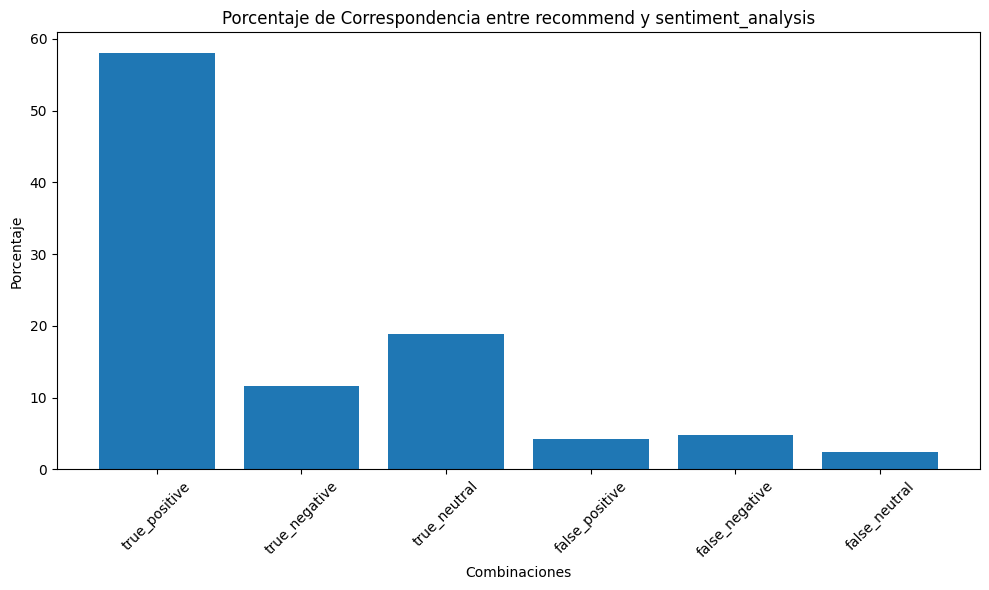

In [10]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(correspondence_percentage.keys(), correspondence_percentage.values())

# Títulos y etiquetas
plt.title('Porcentaje de Correspondencia entre recommend y sentiment_analysis')
plt.xlabel('Combinaciones')
plt.ylabel('Porcentaje')

# Mostrar gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


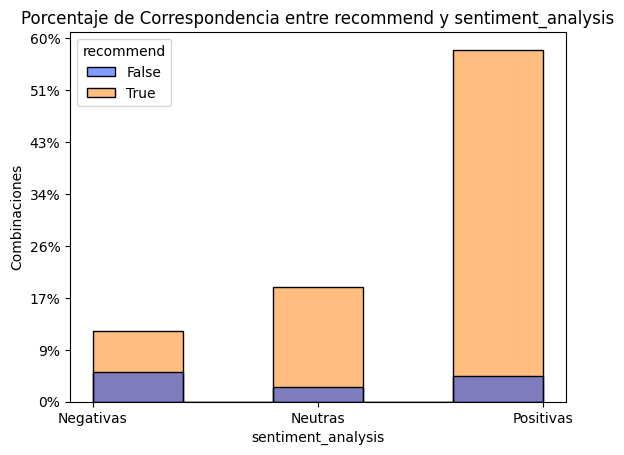

In [11]:
sns.histplot(data=user_reviews_dataset, x='sentiment_analysis', bins=5, palette='bright', hue='recommend')

plt.title('Porcentaje de Correspondencia entre recommend y sentiment_analysis')
plt.xticks(ticks=[0, 1, 2], labels=['Negativas', 'Neutras', 'Positivas'])
plt.ylabel('Combinaciones')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len(user_reviews_dataset)))

plt.show()


La conclusiones a emitir a partir de la exploracion por NLP son varias:
- Por un lado se puede decir que probablemente el análisis de sentimientos no sea del todo exacto, además se sabe que vader no capta del todo bien las ironías o dobles sentidos y ya que depende de las palabras individuales y su valor de polaridad, puede no entender completamente el texto. 
- Tambien se puede ver que se recomendaron juegos aunque las reviews fueron (neutrales) o incluso negativas. Contrariamente no se an recomendado juegos a pesar de tener una review positiva. Según el gráfico y los datos anteriores, claramente se han tendido a recomendar los juegos, a pesar de todo.

<hr/>

# EDA

## users_items_dataset

In [12]:
users_items_dataset = users_items_dataset.drop_duplicates()


In [13]:
users_items_dataset.head()

,user_id,item_name,item_id,playtime_forever
0,76561197970982479,Counter-Strike,10,6
1,76561197970982479,Team Fortress Classic,20,0
2,76561197970982479,Day of Defeat,30,7
3,76561197970982479,Deathmatch Classic,40,0
4,76561197970982479,Half-Life: Opposing Force,50,0


In [14]:
users_items_dataset['playtime_forever'].info()

<class 'pandas.core.series.Series'>
Index: 5094092 entries, 0 to 5153208
Series name: playtime_forever
Non-Null Count    Dtype
--------------    -----
5094092 non-null  int64
dtypes: int64(1)
memory usage: 77.7 MB


### Columna 'playtime_forever'

Estudiaremos 'playtime_forever' que es el unico valor de la tabla que puede análizarse cuantitativamente.

- Outliers y otros

In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
users_items_dataset['playtime_forever'].describe()

count   5094092.00
mean        990.51
std        5414.11
min           0.00
25%           0.00
50%          34.00
75%         355.00
max      642773.00
Name: playtime_forever, dtype: float64

In [16]:
min_playtime_forever = users_items_dataset['playtime_forever'].min()
max_playtime_forever = users_items_dataset['playtime_forever'].max()
print(f"El rango de horas en 'playtime_forever' va desde {min_playtime_forever} hasta {max_playtime_forever}")

El rango de horas en 'playtime_forever' va desde 0 hasta 642773


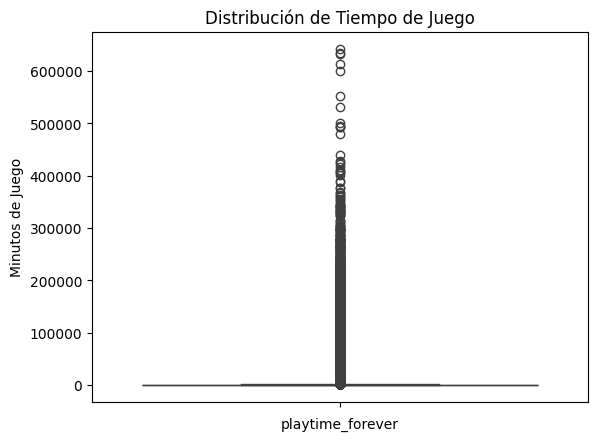

In [17]:
sns.boxplot(data=users_items_dataset, y='playtime_forever')

plt.title('Distribución de Tiempo de Juego')
plt.ylabel('Minutos de Juego')
plt.xlabel('playtime_forever')

plt.show()


In [18]:
sorted_playtime = users_items_dataset.sort_values(by=['playtime_forever'], ascending=[False])
sorted_playtime.head(10)

,user_id,item_name,item_id,playtime_forever
587715,wolop,Garry's Mod,4000,642773
2499068,Evilutional,Mabinogi,212200,635295
4075729,76561198019826668,Call of Duty: Black Ops - Multiplayer,42710,632452
1495340,76561198039832932,Garry's Mod,4000,613411
1836985,tsunamitad,Universe Sandbox,72200,600068
236899,jimmynoe,Garry's Mod,4000,551719
1928125,shinomegami,EVE Online,8500,530882
2905355,lildoughnut,Garry's Mod,4000,501498
3212940,ThisIsWhereIGetOff,Garry's Mod,4000,495058
1026264,76561197977470391,Half-Life 2: Deathmatch,320,493791


A primera vista se puede ver que 'playtime_forever' puede tener un error de dato o la unidad de medida es diferente a la que se piensa. Ya que existe gran cantidad de valores que si fueran horas sobrepasan la cantidad de tiempo posible de juego para un ser humano, por lo que se piensa 'playtime_forever' debe representar cantidad de minutos de juego.

### Análisis 'item_name' vs 'playtime_forever'

Ordenamos según las columnas definidas y sumamos todos los valores de 'playtime_forever' para cada 'item_name'.

In [19]:
item_v_playtime = users_items_dataset.groupby('item_name')['playtime_forever'].sum().reset_index()
item_v_playtime.sort_values('playtime_forever', ascending=False, inplace=True)
item_v_playtime=(item_v_playtime.head(10))

In [20]:

top_3_mas_jugados = item_v_playtime.head(3)
count=0
# Mostrar los tres juegos más jugados uno debajo del otro
for index, row in top_3_mas_jugados.iterrows():
    count+=1
    print(f"Juego {count}: {row['item_name']} \n          Tiempo total de juego: {row['playtime_forever']}")


Juego 1: Counter-Strike: Global Offensive 
          Tiempo total de juego: 775816259
Juego 2: Garry's Mod 
          Tiempo total de juego: 441871026
Juego 3: Terraria 
          Tiempo total de juego: 152997644


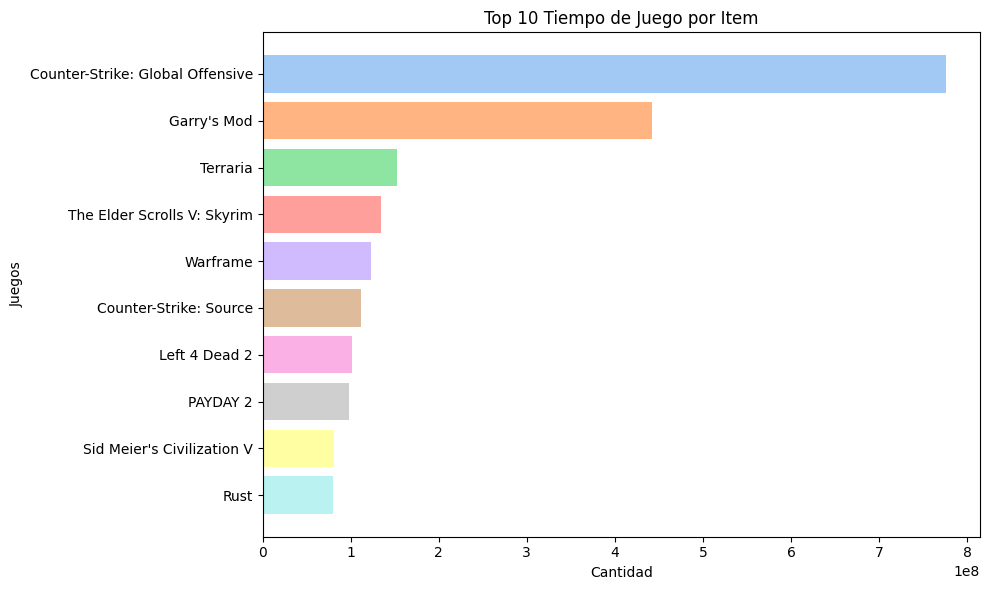

In [21]:
item_names = item_v_playtime['item_name']
playtime_hours = item_v_playtime['playtime_forever']

colors = sns.color_palette('pastel', len(item_names))

plt.figure(figsize=(10, 6))  
plt.barh(item_names, playtime_hours, color=colors) 

plt.title('Top 10 Tiempo de Juego por Item')
plt.xlabel('Cantidad')
plt.ylabel('Juegos')

plt.gca().invert_yaxis()  
plt.tight_layout()

plt.show()

### Análisis 'user_id' & 'item_name' vs 'playtime_forever'

In [22]:
user_item_v_playtime = users_items_dataset.sort_values(by='playtime_forever', ascending=False)
user_item_v_playtime=user_item_v_playtime[['user_id','item_name', 'playtime_forever']].head(10)
user_item_v_playtime.head(10)

,user_id,item_name,playtime_forever
587715,wolop,Garry's Mod,642773
2499068,Evilutional,Mabinogi,635295
4075729,76561198019826668,Call of Duty: Black Ops - Multiplayer,632452
1495340,76561198039832932,Garry's Mod,613411
1836985,tsunamitad,Universe Sandbox,600068
236899,jimmynoe,Garry's Mod,551719
1928125,shinomegami,EVE Online,530882
2905355,lildoughnut,Garry's Mod,501498
3212940,ThisIsWhereIGetOff,Garry's Mod,495058
1026264,76561197977470391,Half-Life 2: Deathmatch,493791


In [23]:

top_3_mayor_jugador_item = user_item_v_playtime.head(3)
count=0
# Mostrar los tres juegos más jugados uno debajo del otro
for index, row in top_3_mayor_jugador_item.iterrows():
    count+=1
    print(f"Jugador {count}: {row['user_id']} -> Juego: {row['item_name']} \n           Tiempo total de juego: {row['playtime_forever']}")


Jugador 1: wolop -> Juego: Garry's Mod 
           Tiempo total de juego: 642773
Jugador 2: Evilutional -> Juego: Mabinogi 
           Tiempo total de juego: 635295
Jugador 3: 76561198019826668 -> Juego: Call of Duty: Black Ops - Multiplayer 
           Tiempo total de juego: 632452


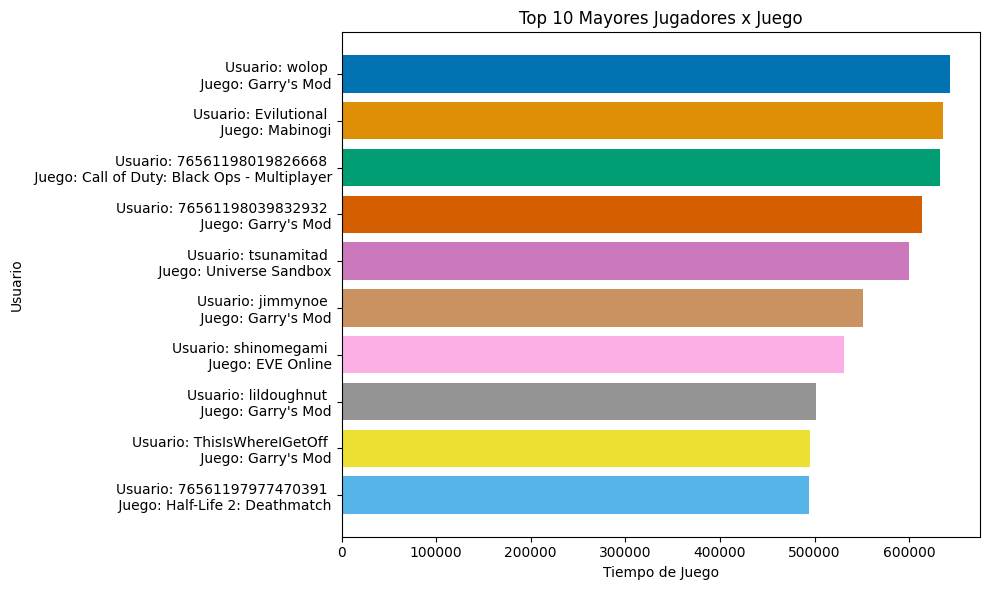

In [24]:
user_ids = user_item_v_playtime['user_id'].astype(str)  
item_ids = user_item_v_playtime['item_name'].astype(str)  

item_names = 'Usuario: ' + user_ids + ' \n ' + 'Juego: ' + item_ids
playtime_hours = user_item_v_playtime['playtime_forever']

colors = sns.color_palette('colorblind', len(item_names))

plt.figure(figsize=(10, 6))  
plt.barh(item_names, playtime_hours, color=colors) 

plt.title('Top 10 Mayores Jugadores x Juego')
plt.xlabel('Tiempo de Juego')
plt.ylabel('Usuario')

plt.gca().invert_yaxis()  
plt.tight_layout()

plt.show()

### Análisis 'user_id' vs 'playtime_forever'

In [25]:
user_v_playtime = users_items_dataset.groupby('user_id')['playtime_forever'].sum().reset_index()
user_v_playtime.sort_values('playtime_forever', ascending=False, inplace=True)
user_v_playtime=(user_v_playtime.head(10))
user_v_playtime.head()

,user_id,playtime_forever
52202,REBAS_AS_F-T,4660393
67522,shinomegami,3303502
53421,Sp3ctre,2822860
46809,DownSyndromeKid,2790419
54005,Terminally-Chill,1734007


In [26]:

top_3_mayor_jugador = user_v_playtime.head(3)
count=0
# Mostrar los tres juegos más jugados uno debajo del otro
for index, row in top_3_mayor_jugador.iterrows():
    count+=1
    print(f"Puesto {count}: {row['user_id']} \n          Tiempo total de juego: {row['playtime_forever']}")


Puesto 1: REBAS_AS_F-T 
          Tiempo total de juego: 4660393
Puesto 2: shinomegami 
          Tiempo total de juego: 3303502
Puesto 3: Sp3ctre 
          Tiempo total de juego: 2822860


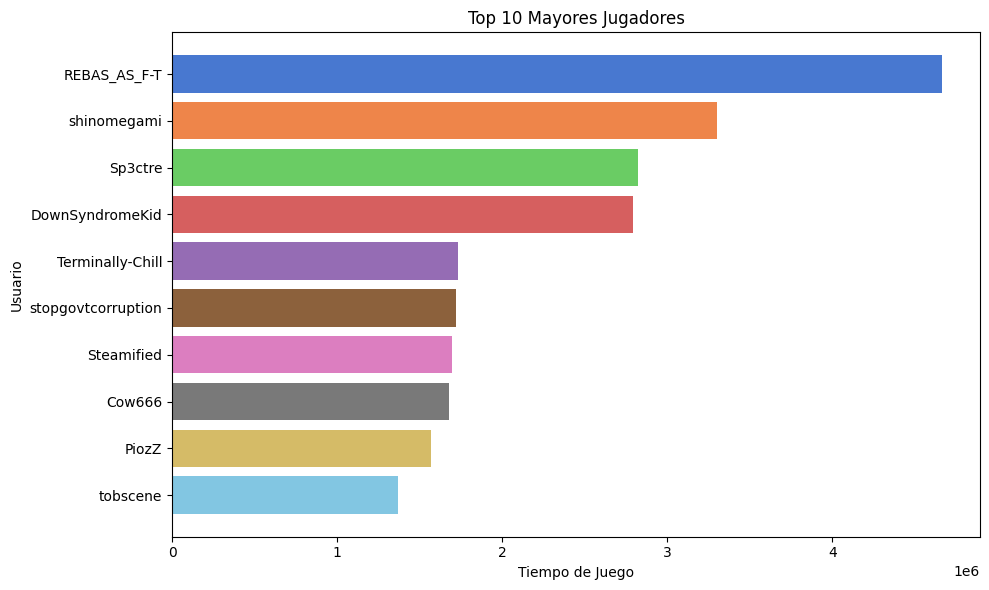

In [27]:
item_names = user_v_playtime['user_id']
playtime_hours = user_v_playtime['playtime_forever']

colors = sns.color_palette('muted', len(item_names))

plt.figure(figsize=(10, 6))  
plt.barh(item_names, playtime_hours, color=colors) 

plt.title('Top 10 Mayores Jugadores')
plt.xlabel('Tiempo de Juego')
plt.ylabel('Usuario')

plt.gca().invert_yaxis()  
plt.tight_layout()

plt.show()

- Del análisis podemos decir que no se observan outliers ya que la distribucion se mantiene ordenada y en torno a clusters.
- Los tiempos maximos de juego se sitúan en valores demasiado altos, aunque en algunas partes del análisis se trate de sumatorias, se puede ver que hay jugadores que han dedicado inmensa cantidad de tiempo. Lo que podría llevar a revisar alguna parte de la extraccion y transformacion de datos, ademas de la unidad de medida del tiempo de juego.

---

## steam_games_dataset

In [28]:
steam_games_dataset = steam_games_dataset.drop_duplicates()

In [29]:
steam_games_dataset['release_year'] = steam_games_dataset['release_year'].astype(int)

In [30]:
steam_games_dataset.head()

,app_name,item_id,genres,price,developer,release_year
0,Lost Summoner Kitty,761140,Action,4.99,Kotoshiro,2018
1,Lost Summoner Kitty,761140,Casual,4.99,Kotoshiro,2018
2,Lost Summoner Kitty,761140,Indie,4.99,Kotoshiro,2018
3,Lost Summoner Kitty,761140,Simulation,4.99,Kotoshiro,2018
4,Lost Summoner Kitty,761140,Strategy,4.99,Kotoshiro,2018


In [31]:
steam_games_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55606 entries, 0 to 55606
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   app_name      55606 non-null  object 
 1   item_id       55606 non-null  int64  
 2   genres        55606 non-null  object 
 3   price         55606 non-null  float64
 4   developer     55606 non-null  object 
 5   release_year  55606 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.0+ MB


### Columna 'price'

- Estudiaremos 'price' que es uno de los valores que pueden darnos información sobre el dataframe 'steam_games_dataset' 

Para simplificar los datos, eliminamos la columna 'genres' ya que para una misma 'app_name' puede dar varios resultados. 

In [32]:
steam_games_dataset_price = steam_games_dataset.drop('genres', axis=1)


In [33]:
steam_games_dataset_price.drop_duplicates(inplace=True)

- Outliers y otros

In [34]:
steam_games_dataset_price[['price']].describe()

,price
count,22527.00
mean,8.97
std,15.42
min,0.00
25%,2.99
50%,4.99
75%,9.99
max,995.00


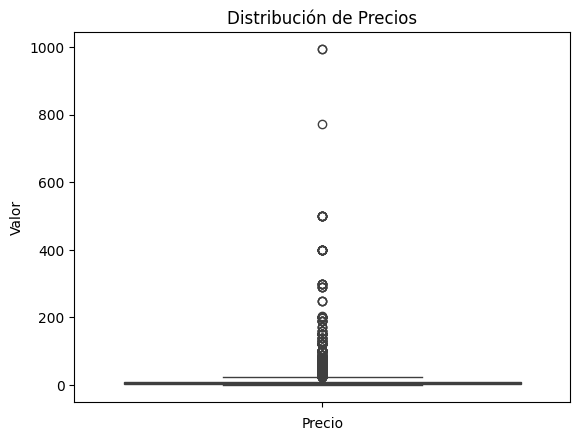

In [35]:
sns.boxplot(data=steam_games_dataset,y='price')

plt.title('Distribución de Precios')
plt.ylabel('Valor')
plt.xlabel('Precio')

plt.show()

Aqui se puede ver algunos outliers, pero los analizaremos con mayor detenimiento para ver si es así. 

In [36]:
sorted_prices = steam_games_dataset_price.sort_values(by='price', ascending=False).head(10)[['app_name','developer','release_year','price']]
sorted_prices.head(10)

,app_name,developer,release_year,price
20808,Strata Spaces VR – Professional Edition Upgrade,"Strata Mixed Reality, Inc.",2017,995.00
3800,X-Plane 10 Global - 64 Bit,Laminar Research,2014,771.71
24795,CUR3D Maker Edition - Permission for commercia...,RUHRSOURCE GmbH,2017,499.99
31212,EVE Online: 15400 PLEX,CCP,2017,499.99
15373,GameMaker Studio 2 Mobile,YoYo Games Ltd.,2017,399.99
15378,GameMaker Studio 2 UWP,YoYo Games Ltd.,2017,399.99
7586,MODO indie 10,The Foundry,2015,299.99
51562,Clickteam Fusion 2.5 Developer Upgrade,Clickteam,2014,299.99
47003,CopperCube - Professional Edition,Ambiera e.U.,2015,289.99
31209,EVE Online: 7430 PLEX,CCP,2017,249.99


In [37]:
filtered_names = sorted_prices.loc[sorted_prices['price'] > 300, ['app_name', 'price']]
cantidad_juegos = len(filtered_names)
print('Juegos Más Caros:')
count = 0
for index, row in filtered_names.iterrows():
    count += 1
    print(f"Puesto {count}:\n          {row['app_name']} \n          Precio: {row['price']}")

Juegos Más Caros:
Puesto 1:
          Strata Spaces VR – Professional Edition Upgrade 
          Precio: 995.0
Puesto 2:
          X-Plane 10 Global - 64 Bit 
          Precio: 771.71
Puesto 3:
          CUR3D Maker Edition - Permission for commercial use 
          Precio: 499.99
Puesto 4:
          EVE Online: 15400 PLEX 
          Precio: 499.99
Puesto 5:
          GameMaker Studio 2 Mobile 
          Precio: 399.99
Puesto 6:
          GameMaker Studio 2 UWP 
          Precio: 399.99


- Top 10 Juegos Mas Caros

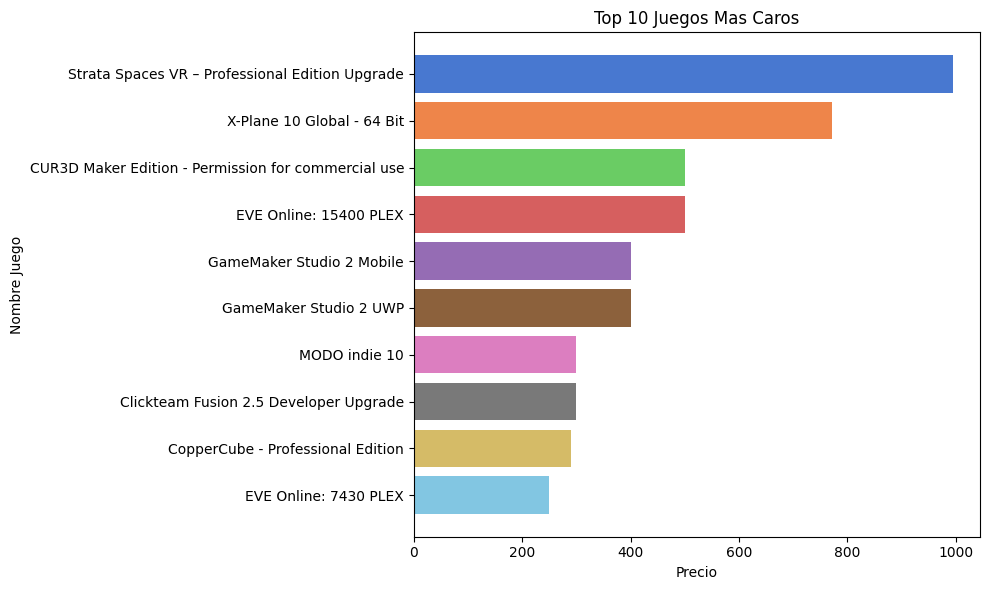

In [38]:
item_price = sorted_prices['price']
price_app_name = sorted_prices['app_name']

colors = sns.color_palette('muted', len(item_price))

plt.figure(figsize=(10, 6))  
plt.barh(price_app_name,item_price, color=colors) 

plt.title('Top 10 Juegos Mas Caros')
plt.xlabel('Precio')
plt.ylabel('Nombre Juego')

plt.gca().invert_yaxis()  
plt.tight_layout()

plt.show()

A partir de los nombres de los juegos, podemos ver que no son necesariamente outliers, ya que se trata de programas de uso profesional, que puden ser caros por ser herramientas de tabajo. Tambien hay juegos de ediciones limitadas que pueden tener precios elevados o tienen contenidos adicionales que al comprarlos todos, pueden llegar a sumar valores similares a las antes vistos.

---

## Análisis Combinados y Generales

### Developer con mas Juegos

In [39]:
mas_juegos_dev = steam_games_dataset_price.groupby('developer')['item_id'].count().reset_index()
mas_juegos_dev.rename(columns={'item_id': 'cuenta_juegos'}, inplace=True)
mas_juegos_dev = mas_juegos_dev.sort_values('cuenta_juegos', ascending=False).head(10)
mas_juegos_dev.head()

,developer,cuenta_juegos
2566,Dovetail Games,253
4673,"KOEI TECMO GAMES CO., LTD.",180
9073,Ubisoft - San Francisco,178
1529,Capcom,107
6422,Paradox Development Studio,97


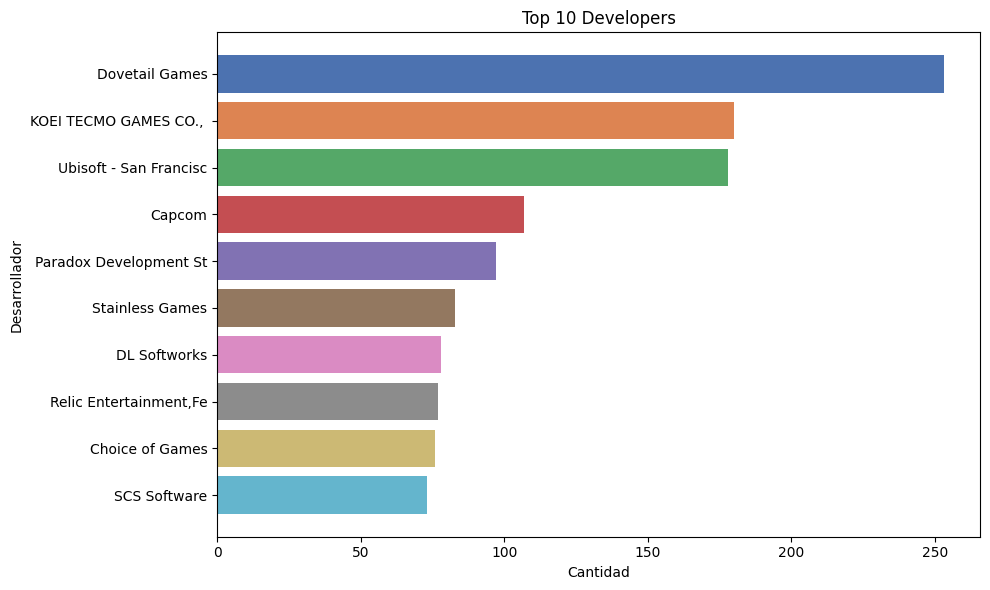

In [40]:
cuenta_juegos = mas_juegos_dev['cuenta_juegos']
cuenta_dev = mas_juegos_dev['developer'].str.slice(0, 22)

colors = sns.color_palette('deep', len(item_price))

plt.figure(figsize=(10, 6))  
plt.barh(cuenta_dev,cuenta_juegos, color=colors) 

plt.title('Top 10 Developers')
plt.xlabel('Cantidad')
plt.ylabel('Desarrollador')

plt.gca().invert_yaxis()  
plt.tight_layout()

plt.show()

### Año con mas juegos lanzados

In [41]:
lanzamientos_por_anio = steam_games_dataset_price['release_year'].value_counts()
top_10_lanzamientos_por_anio = lanzamientos_por_anio.sort_values(ascending=False).head(10)
top_10_lanzamientos_por_anio.head()

release_year
2017    7239
2016    5111
2015    3511
2014    1978
2013    1233
Name: count, dtype: int64

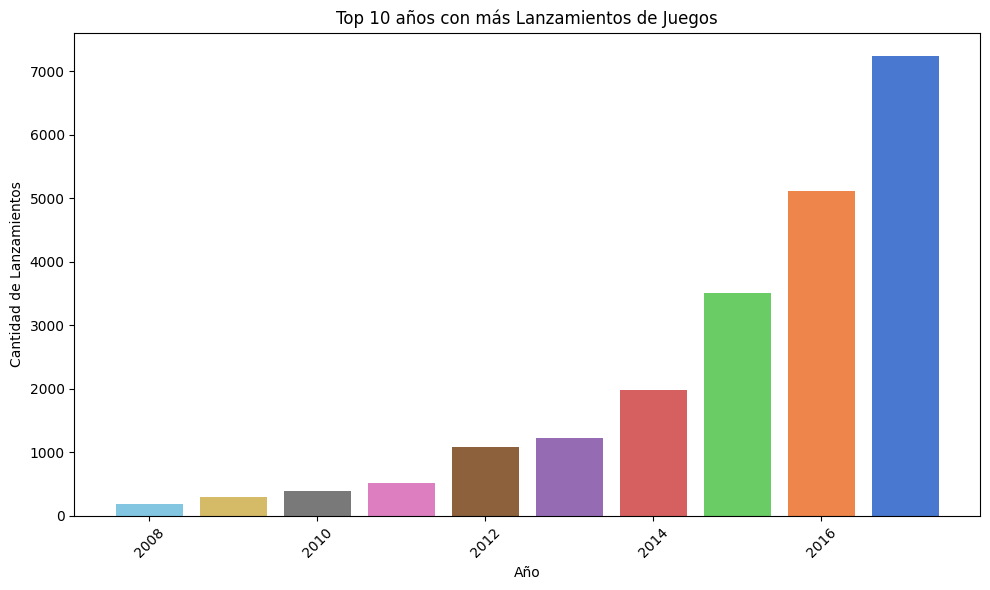

In [42]:
anio_lanzamiento = top_10_lanzamientos_por_anio.values
cuenta_lanzamiento = top_10_lanzamientos_por_anio.index

# Crear el gráfico de barras verticales
plt.figure(figsize=(10, 6))
colors = sns.color_palette('muted', len(cuenta_lanzamiento))
plt.bar(cuenta_lanzamiento, anio_lanzamiento, color=colors)

plt.title('Top 10 años con más Lanzamientos de Juegos')
plt.xlabel('Año')
plt.ylabel('Cantidad de Lanzamientos')

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad si es necesario
plt.tight_layout()

plt.show()

### Cantidad Genero vs. Año

In [43]:
generos_por_anio = steam_games_dataset.groupby(['release_year', 'genres']).size().reset_index(name='count')
top_10_generos_por_anio = (generos_por_anio.sort_values(['count', 'release_year'], ascending=[False, True])
                           .groupby('release_year')
                           .head(10))

top_10_generos_por_anio = top_10_generos_por_anio[['genres','release_year','count']].head(10)
top_10_generos_por_anio.head()

,genres,release_year,count
335,Indie,2017,4843
314,Indie,2016,3279
326,Action,2017,3024
330,Casual,2017,2559
327,Adventure,2017,2447


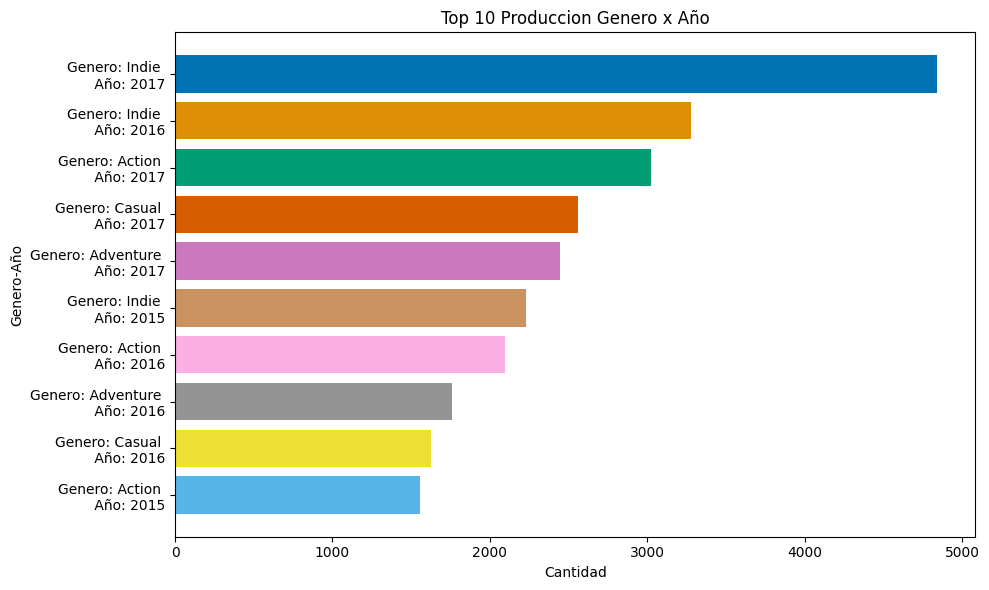

In [44]:
top_genero = top_10_generos_por_anio['genres'].astype(str)  
top_year = top_10_generos_por_anio['release_year'].astype(str)  

top_gen_yr_item_names = 'Genero: ' + top_genero + ' \n ' + 'Año: ' + top_year
cant_genero_anio = top_10_generos_por_anio['count']

colors = sns.color_palette('colorblind', len(top_year))

plt.figure(figsize=(10, 6))  
plt.barh(top_gen_yr_item_names, cant_genero_anio, color=colors) 

plt.title('Top 10 Produccion Genero x Año')
plt.xlabel('Cantidad')
plt.ylabel('Genero-Año')

plt.gca().invert_yaxis()  
plt.tight_layout()

plt.show()

### Cantidad Genero vs. Desarrollador

In [45]:
generos_por_dev = steam_games_dataset.groupby(['genres', 'developer']).size().reset_index(name='count')
top_10_generos_por_dev = (generos_por_dev.sort_values(['count', 'genres'], ascending=[False, True])
                           .groupby('developer')
                           .head(10))

top_10_generos_por_dev = top_10_generos_por_dev[['genres','developer','count']].head(10)
top_10_generos_por_dev.head()

,genres,developer,count
25955,Simulation,Dovetail Games,253
12297,Casual,Ubisoft - San Francisco,178
27206,Simulation,Ubisoft - San Francisco,176
803,Action,Capcom,107
29513,Strategy,Paradox Development Studio,97


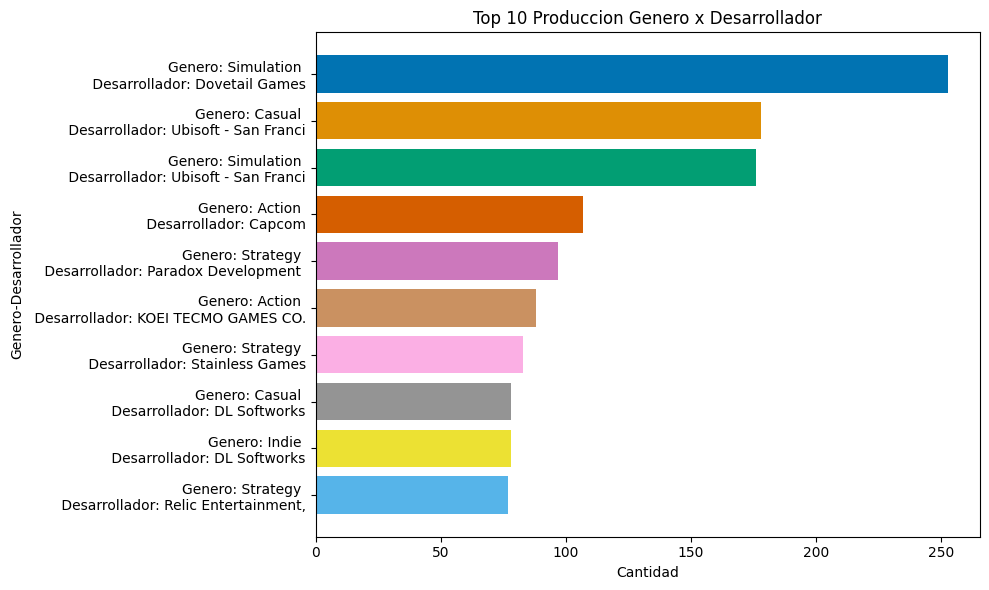

In [46]:
top_genero = top_10_generos_por_dev['genres'].astype(str)  
top_dev = top_10_generos_por_dev['developer'].astype(str).str.slice(0, 20)

top_gen_dev = 'Genero: ' + top_genero + ' \n ' + 'Desarrollador: ' + top_dev
cant_genero_dev = top_10_generos_por_dev['count']

colors = sns.color_palette('colorblind', len(top_gen_dev))

plt.figure(figsize=(10, 6))  
plt.barh(top_gen_dev, cant_genero_dev, color=colors) 

plt.title('Top 10 Produccion Genero x Desarrollador')
plt.xlabel('Cantidad')
plt.ylabel('Genero-Desarrollador')

plt.gca().invert_yaxis()  
plt.tight_layout()

plt.show()

###  Top 10 Generos mas Caros

In [47]:
sorted_prices_genre = steam_games_dataset.sort_values(by='price', ascending=False).head(10)[['genres','price']]
sorted_prices_genre.head(10)

,genres,price
20808,Animation & Modeling,995.00
20809,Design & Illustration,995.00
3800,Simulation,771.71
24795,Animation & Modeling,499.99
24796,Design & Illustration,499.99
24797,Education,499.99
24798,Utilities,499.99
31213,Massively Multiplayer,499.99
31214,RPG,499.99
31212,Free to Play,499.99


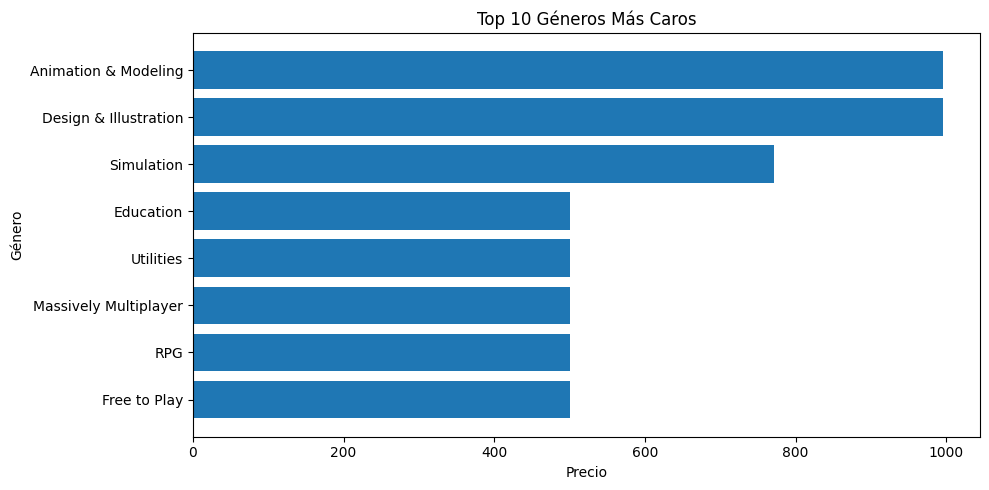

In [48]:
plt.figure(figsize=(10, 5))  
plt.barh(sorted_prices_genre['genres'], sorted_prices_genre['price'])

plt.title('Top 10 Géneros Más Caros')
plt.xlabel('Precio')
plt.ylabel('Género')

plt.gca().invert_yaxis()  
plt.tight_layout()

plt.show()

---

### Top 10 mas recomendados

recomendaciones_true_por_item = user_reviews_dataset[user_reviews_dataset['recommend']]
recomendaciones_true_por_item = recomendaciones_true_por_item.groupby('item_id')['recommend'].count().reset_index()
recomendaciones_true_por_item = recomendaciones_true_por_item.sort_values(by='recommend', ascending=False)
recomendaciones_true_por_item = pd.merge(recomendaciones_true_por_item, steam_games_dataset[['item_id', 'app_name']], on='item_id', how='left')
recomendaciones_true_por_item = recomendaciones_true_por_item.drop_duplicates(subset='item_id')
recomendaciones_true_por_item = recomendaciones_true_por_item.dropna(subset='app_name')
top_10_mas_recomendados = recomendaciones_true_por_item.head(10)
top_10_mas_recomendados.head(10)

In [49]:
recomendaciones_true_por_item = user_reviews_dataset[user_reviews_dataset['recommend']]
conteo_recomendaciones_true = recomendaciones_true_por_item['item_id'].value_counts().reset_index()
conteo_recomendaciones_true.columns = ['item_id', 'recommend']
top_10_mas_recomendados = pd.merge(conteo_recomendaciones_true, steam_games_dataset[['item_id', 'app_name']], on='item_id', how='left')
top_10_mas_recomendados = top_10_mas_recomendados.dropna(subset=['app_name']).drop_duplicates(subset=['item_id'])
top_10_mas_recomendados = top_10_mas_recomendados.sort_values(by='recommend', ascending=False).head(10)
top_10_mas_recomendados.head(10)

,item_id,recommend,app_name
0,440,3571,Team Fortress 2
2,730,3429,Counter-Strike: Global Offensive
3,4000,1657,Garry's Mod
6,304930,943,Unturned
12,550,722,Left 4 Dead 2
13,105600,711,Terraria
17,252490,695,Rust
24,221100,567,DayZ
28,230410,557,Warframe
30,49520,537,Borderlands 2


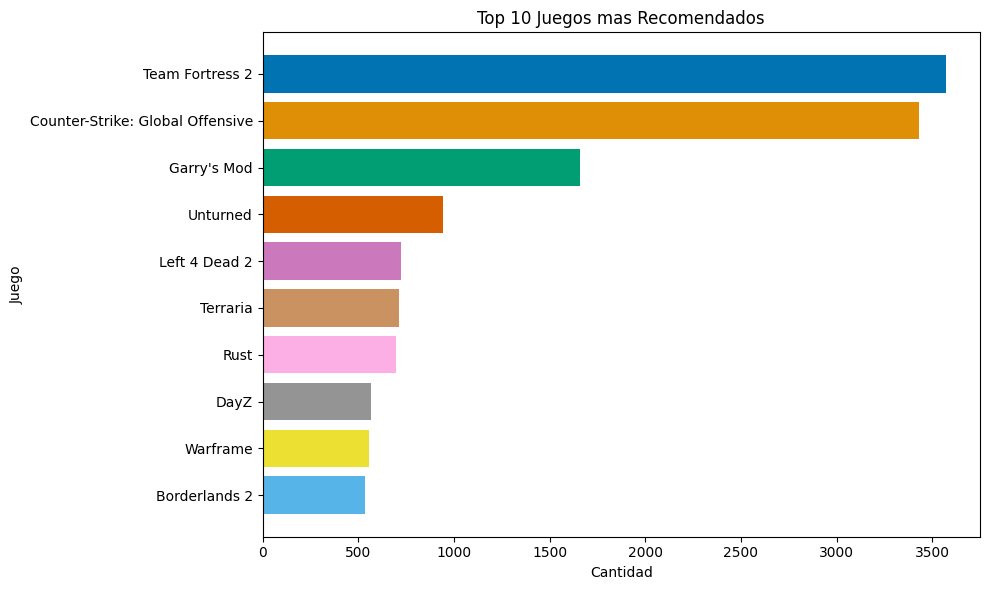

In [50]:
colors = sns.color_palette('colorblind', len(top_10_mas_recomendados['recommend']))

plt.figure(figsize=(10, 6))  
plt.barh(top_10_mas_recomendados['app_name'], top_10_mas_recomendados['recommend'], color=colors) 

plt.title('Top 10 Juegos mas Recomendados')
plt.xlabel('Cantidad')
plt.ylabel('Juego')

plt.gca().invert_yaxis()  
plt.tight_layout()

plt.show()

### Top 10 menos recomendados

In [51]:
menos_recomendaciones_true_por_item = user_reviews_dataset[user_reviews_dataset['recommend']]
menos_recomendaciones_true_por_item = menos_recomendaciones_true_por_item.groupby('item_id')['recommend'].count().reset_index()
menos_recomendaciones_true_por_item = menos_recomendaciones_true_por_item.sort_values(by='recommend', ascending=True)
menos_recomendaciones_true_por_item = pd.merge(menos_recomendaciones_true_por_item, steam_games_dataset[['item_id', 'app_name']], on='item_id', how='left')
menos_recomendaciones_true_por_item = menos_recomendaciones_true_por_item.drop_duplicates(subset='item_id')
menos_recomendaciones_true_por_item = menos_recomendaciones_true_por_item.dropna(subset='app_name')
top_10_menos_recomendados = menos_recomendaciones_true_por_item.head(10)
top_10_menos_recomendados.head(10)

,item_id,recommend,app_name
0,527340,1,What The Box?
2,328220,1,Wild Season
6,328830,1,Rugby Union Team Manager 2015
15,329430,1,State of Decay: YOSE
18,329650,1,NAM
19,329830,1,The Moon Sliver
20,223810,1,Ys I & II Chronicles+
23,223770,1,DCS: P-51D Mustang
25,330100,1,BossConstructor
29,330350,1,Robotex


In [52]:
menos_recomendados = user_reviews_dataset[~user_reviews_dataset['recommend']]
conteo_menos_recomendados = menos_recomendados['item_id'].value_counts().reset_index()
conteo_menos_recomendados.columns = ['item_id', 'count']
top_10_menos_recomendados = pd.merge(conteo_menos_recomendados, steam_games_dataset[['item_id', 'app_name']], on='item_id', how='left')
top_10_menos_recomendados = top_10_menos_recomendados.dropna(subset=['app_name']).drop_duplicates(subset=['item_id'])
top_10_menos_recomendados = top_10_menos_recomendados.sort_values(by='count', ascending=True).head(10)
top_10_menos_recomendados.head(10)

,item_id,count,app_name
1783,376300,1,GUILTY GEAR Xrd -SIGN-
2345,45770,1,Dead Rising 2: Off the Record
2342,298400,1,Knightmare Tower
2339,331120,1,Passing Pineview Forest
2337,222420,1,THE KING OF FIGHTERS '98 ULTIMATE MATCH FINAL ...
2334,287220,1,Autocraft
2332,292600,1,Duet
2329,9070,1,DOOM 3 Resurrection of Evil
2327,222750,1,Wargame: Airland Battle
2325,270370,1,Lambda Wars Beta


Debido a que todos ellos tienen la misma cantidad, hacer un grafico no tiene mucho sentido.

### Proporcion Juegos Gratuitos vs. Pagos

In [53]:
juegos_gratuitos = steam_games_dataset[steam_games_dataset['price'] == 0]
juegos_pagos = steam_games_dataset[steam_games_dataset['price'] > 0]
cantidad_juegos_gratuitos = len(juegos_gratuitos)
cantidad_juegos_pagos = len(juegos_pagos)
porcentaje_juegos_gratuitos=(cantidad_juegos_gratuitos*100)/len(steam_games_dataset)
porcentaje_juegos_pagos=(cantidad_juegos_pagos*100)/len(steam_games_dataset)

print(f"La cantidad de juegos gratuitos es: {cantidad_juegos_gratuitos} -> ({porcentaje_juegos_gratuitos:.2f} %)\n"
      f"La cantidad de juegos pagos es: {cantidad_juegos_pagos} -> ({porcentaje_juegos_pagos:.2f} %)")

La cantidad de juegos gratuitos es: 4174 -> (7.51 %)
La cantidad de juegos pagos es: 51432 -> (92.49 %)


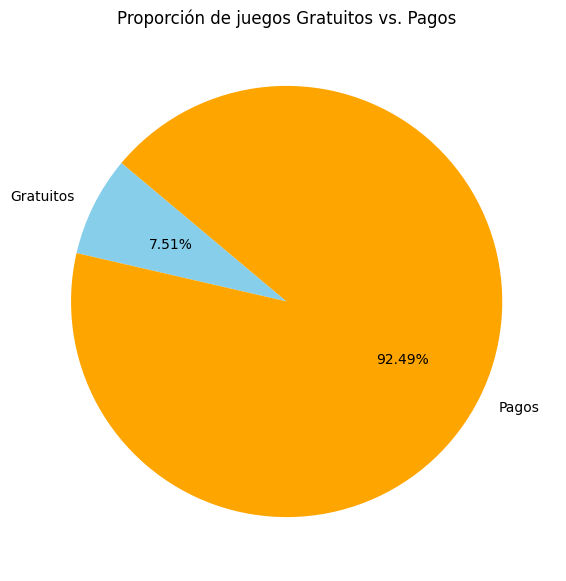

In [54]:
plt.figure(figsize=(7, 7))
labels = ['Gratuitos', 'Pagos']
sizes = [cantidad_juegos_gratuitos, cantidad_juegos_pagos]
colors = ['skyblue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Proporción de juegos Gratuitos vs. Pagos')
plt.show()
